In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import yfinance as yf

In [3]:
ticker=yf.Ticker('IDEA.NS')

In [4]:
#period='max'
#start='2020-01-01'yyyy-mm-dd
#end='2021-12-31'
df=ticker.history(period='max')

<Axes: xlabel='Date'>

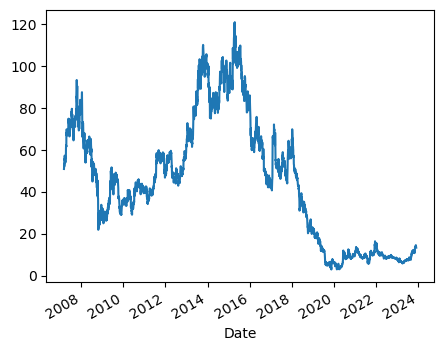

In [5]:
df["Close"].plot(figsize=(5,4))

In [6]:
#daily-return=(pre_close/curr_close)-1
#log_daily_return=log(pre_close/curr_close)

In [7]:
df["current_close"]=df["Close"].shift(1)

In [8]:
df["daily_return"]=(df["Close"]/df["current_close"])-1
df["log_daily_return"]=np.log(df["Close"]/df["current_close"])


<Axes: xlabel='Date'>

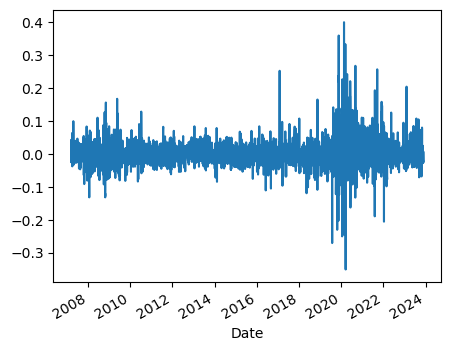

In [9]:
df["daily_return"].plot(figsize=(5,4))

<Axes: xlabel='Date'>

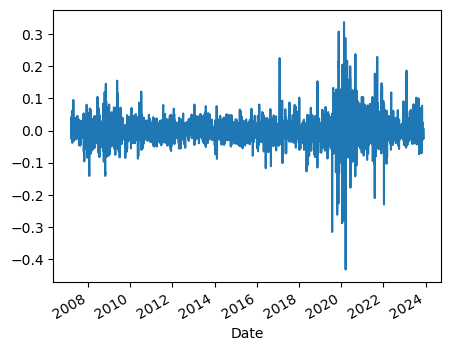

In [10]:
df["log_daily_return"].plot(figsize=(5,4))

<Axes: >

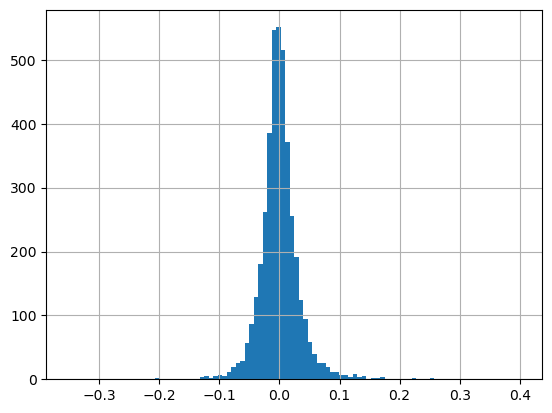

In [11]:
df["daily_return"].hist(bins=100)

c:\Users\anjal\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anjal\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


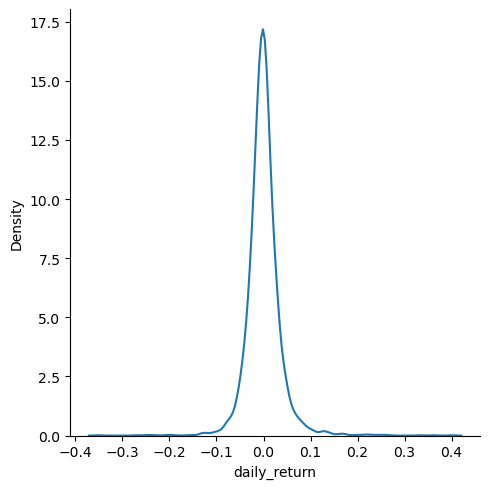

In [12]:
sns.displot(data=df,x="daily_return",kind='kde')

In [13]:
ticker1=yf.Ticker("ACCURACY.NS")

In [14]:
df1=ticker1.history(period='max')

<Axes: xlabel='Date'>

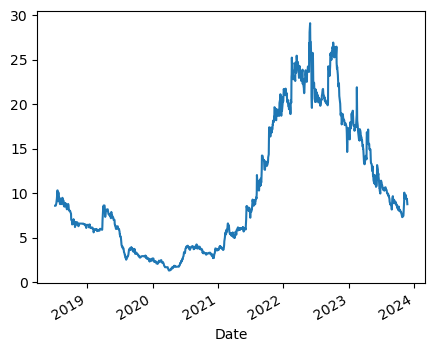

In [15]:
df1["Close"].plot(figsize=(5,4))

In [16]:
df1["current_close"]=df1["Close"].shift(1)

In [17]:
df1["daily_return"]=(df1["Close"]/df1["current_close"])-1
df1["log_daily_return"]=np.log(df1["Close"]/df1["current_close"])


<Axes: xlabel='Date'>

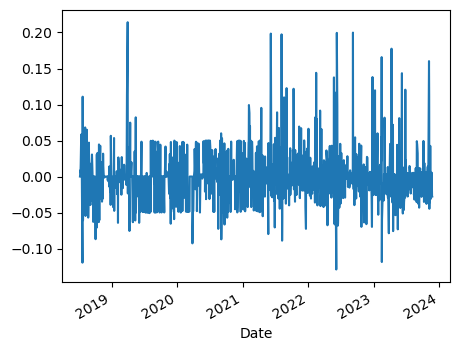

In [18]:
df1["daily_return"].plot(figsize=(5,4))

<Axes: xlabel='Date'>

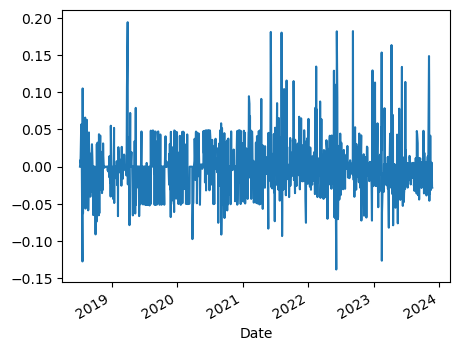

In [19]:
df1["log_daily_return"].plot(figsize=(5,4))

<Axes: >

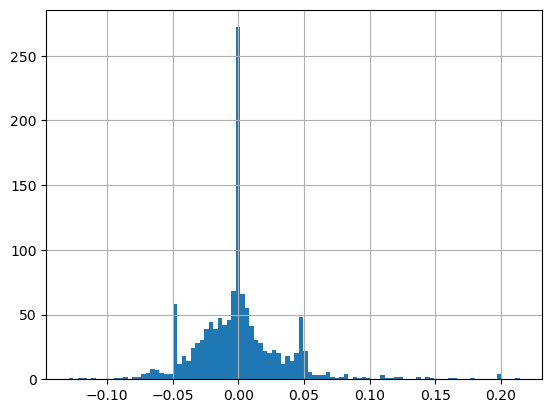

In [20]:
df1["daily_return"].hist(bins=100)

c:\Users\anjal\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anjal\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


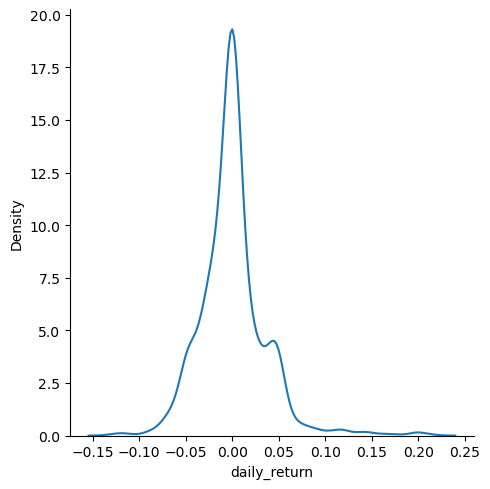

In [21]:
sns.displot(data=df1,x="daily_return",kind='kde')

In [22]:
def MA(df,period):
    return df["Close"].rolling(period).mean()

In [23]:
df["50_mavg"]=MA(df,period=50)
df["100_mavg"]=MA(df,period=100)
df["200_mavg"]=MA(df,period=200)


df["signal"]=np.where(df["50_mavg"]>df["200_mavg"],df["Close"].max(),-1)


<Axes: xlabel='Date'>

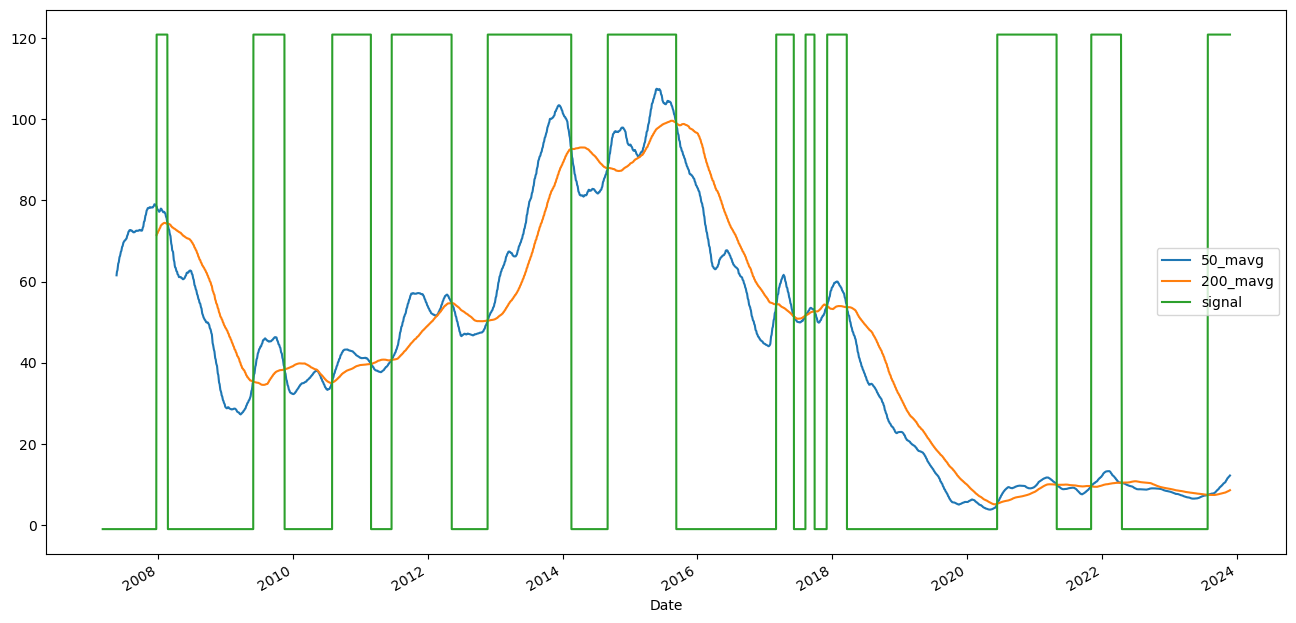

In [24]:
plt.figure(figsize=(16,8))
#df["Close"].plot(legend=True)
df["50_mavg"].plot(legend=True)
df["200_mavg"].plot(legend=True)
df["signal"].plot(legend=True)

In [25]:
#MAWI=the moving average width indicator
#MACI=moving average contrarian indicator

In [26]:
df["signal"]=np.where(df["50_mavg"]>df["200_mavg"],"SELL","BUY")

In [27]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,current_close,daily_return,log_daily_return,50_mavg,100_mavg,200_mavg,signal
Date,,,,,,,,,,,,,,
2007-03-09 00:00:00+05:30,50.459805,54.615318,50.103621,50.875355,290137891,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,BUY
2007-03-12 00:00:00+05:30,51.765827,53.398350,50.994085,52.032967,38738166,0.0,0.0,50.875355,0.022754,0.022499,NaN,NaN,NaN,BUY
2007-03-13 00:00:00+05:30,52.240740,54.140403,51.142500,53.428032,46376399,0.0,0.0,52.032967,0.026811,0.026458,NaN,NaN,NaN,BUY
2007-03-14 00:00:00+05:30,51.647099,53.902946,51.379960,52.092331,30761009,0.0,0.0,53.428032,-0.025000,-0.025318,NaN,NaN,NaN,BUY
2007-03-15 00:00:00+05:30,52.389149,55.921339,52.389149,54.348179,56159369,0.0,0.0,52.092331,0.043305,0.042393,NaN,NaN,NaN,BUY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20 00:00:00+05:30,14.650000,15.050000,14.000000,14.150000,359762952,0.0,0.0,14.550000,-0.027491,-0.027876,11.985,10.015,8.46150,SELL
2023-11-21 00:00:00+05:30,14.300000,14.350000,13.700000,13.850000,210863398,0.0,0.0,14.150000,-0.021201,-0.021429,12.049,10.077,8.49875,SELL
2023-11-22 00:00:00+05:30,13.800000,13.850000,13.300000,13.500000,207998055,0.0,0.0,13.850000,-0.025271,-0.025596,12.109,10.137,8.53225,SELL


In [28]:
df["MAWI"]=df["50_mavg"]-df["200_mavg"]
df["MAWI_NORM"]=(df["MAWI"]-df["MAWI"].min())/(df["MAWI"].max()-df["MAWI"].min())*100

In [29]:
df[df["MAWI_NORM"]==0]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,current_close,daily_return,log_daily_return,50_mavg,100_mavg,200_mavg,signal,MAWI,MAWI_NORM
Date,,,,,,,,,,,,,,,,
2016-03-28 00:00:00+05:30,63.161272,63.670154,61.9639,63.071468,8757143,0.0,0.0,62.831993,0.003811,0.003804,63.573166,72.808482,84.757281,BUY,-21.184115,0.0


In [30]:
df["80"]=80
df["20"]=20

<Axes: xlabel='Date'>

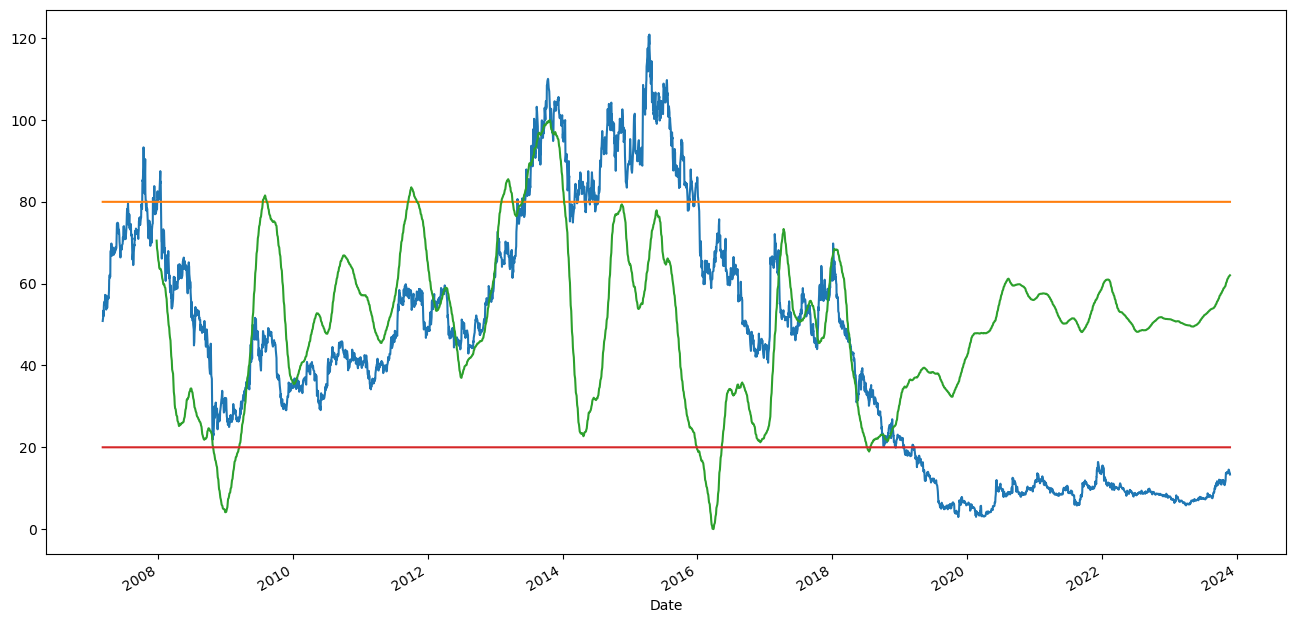

In [31]:
plt.figure(figsize=(16,8))
df["Close"].plot()
df["80"].plot()
df["MAWI_NORM"].plot()
df["20"].plot()

In [32]:
df["MACI"]=df["Close"]-df["200_mavg"]
df["MACI_NORM"]=(df["MACI"]-df["MACI"].min())/(df["MACI"].max()-df["MACI"].min())*100

<Axes: xlabel='Date'>

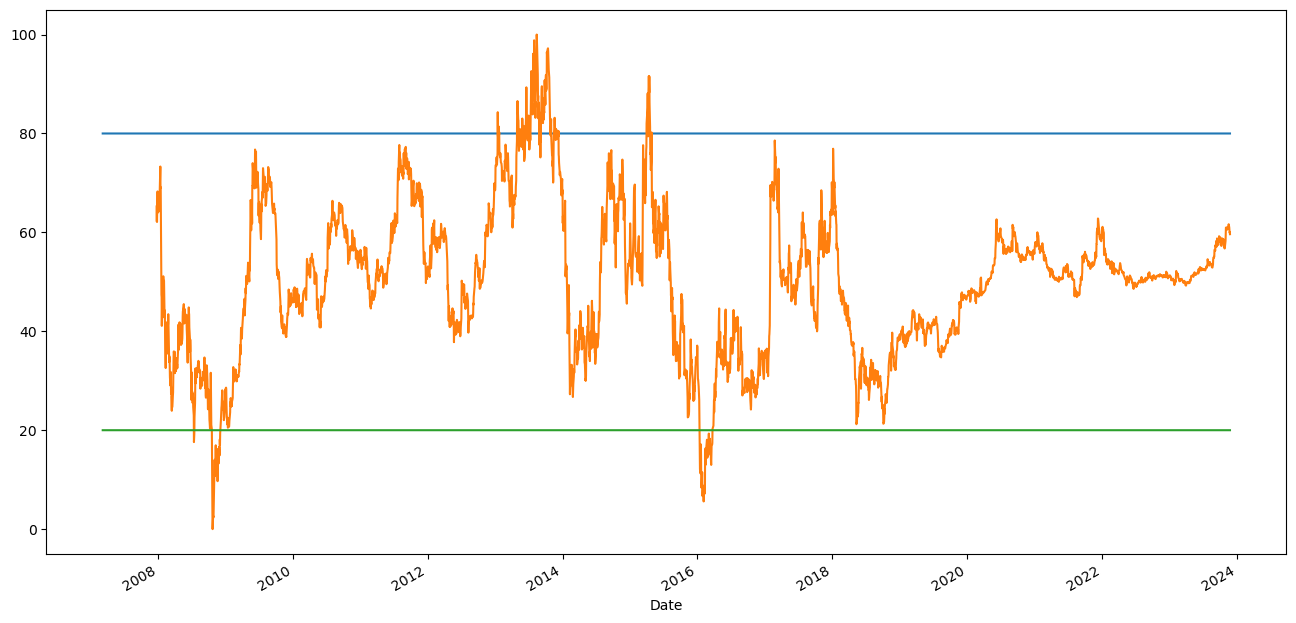

In [33]:
plt.figure(figsize=(16,8))
#df["Close"].plot()
df["80"].plot()
df["MACI_NORM"].plot()
df["20"].plot()